In [1]:
import bagpy
from bagpy import bagreader

In [2]:
#stationary_open = bagreader('/home/laleth/Robotic Sensing and Navigation/Lab0/LAB0_ws/src/Data/open_stationary.bag')
#walking_open = bagreader('/home/laleth/Robotic Sensing and Navigation/Lab0/LAB0_ws/src/Data/open_walking.bag')

#stationary_occluded = bagreader('/home/laleth/Robotic Sensing and Navigation/Lab0/LAB0_ws/src/Data/occluded_stationary.bag')
#walking_occluded = bagreader('/home/laleth/Robotic Sensing and Navigation/Lab0/LAB0_ws/src/Data/occluded_walking.bag')

In [3]:
#stationary_open.topic_table

In [4]:
#gps_data_op_s = stationary_open.message_by_topic('/gps')
#gps_data_op_w = walking_open.message_by_topic('/gps')

#gps_data_oc_s = stationary_occluded.message_by_topic('/gps')
#gps_data_oc_w = walking_occluded.message_by_topic('/gps')

In [5]:
import pandas as pd
df_op_s = pd.read_csv('open_stationary/gps.csv')
df_op_w = pd.read_csv('open_walking/gps.csv')

df_oc_s = pd.read_csv('occluded_stationary/gps.csv')
df_oc_w = pd.read_csv('occluded_walking/gps.csv')

In [6]:
df_oc_s.head()
df_oc_w.tail()

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,Altitude,HDOP,Fix_quality,UTM_easting,UTM_northing,UTC,Zone,Letter
22,1.677021e+09,43,231541,0,GPS1_Frame,42.308220,-71.106049,25.700001,1.54,5,326422.81250,4686146.5,231541.0,19,T
23,1.677021e+09,44,231543,0,GPS1_Frame,42.308228,-71.106033,26.700001,1.54,5,326423.65625,4686147.5,231543.0,19,T
24,1.677021e+09,45,231544,0,GPS1_Frame,42.308235,-71.106033,26.700001,1.54,5,326424.00000,4686148.0,231544.0,19,T
25,1.677021e+09,46,231545,0,GPS1_Frame,42.308239,-71.106033,26.900000,1.28,5,326424.09375,4686148.0,231545.0,19,T
26,1.677021e+09,47,231546,0,GPS1_Frame,42.308239,-71.106026,26.900000,1.28,5,326424.18750,4686148.5,231546.0,19,T


## Analysis of stationary data from open field
Location - Scagnoli-Nihill Athletic Complex in Jamaica Plains

From google maps -> lat = 42.30775, lon = -71.10752
***

In [7]:
# Location - Scagnoli-Nihill Athletic Complex in Jamaica Plains
# From google maps -> lat = 42.30775, lon = -71.10752

known_lat, known_lon = 42.30775, -71.10752

import utm

utm_converted = utm.from_latlon(42.30775,-71.10752)

known_easting,known_northing,known_zone,known_letter = utm_converted[0],utm_converted[1],utm_converted[2],utm_converted[3]

In [8]:
# Scaling data
df_op_s['modified_northing'] = df_op_s['UTM_northing'] - df_op_s.UTM_northing[0]
df_op_s['modified_easting'] = df_op_s['UTM_easting'] - df_op_s.UTM_easting[0]

df_op_s.tail()

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,Altitude,HDOP,Fix_quality,UTM_easting,UTM_northing,UTC,Zone,Letter,modified_northing,modified_easting
614,1.677019e+09,617,223820,0,GPS1_Frame,42.308018,-71.107338,26.799999,0.94,4,326315.78125,4686126.5,223820.0,19,T,0.0,0.0
615,1.677019e+09,618,223821,0,GPS1_Frame,42.308018,-71.107338,26.799999,0.87,4,326315.78125,4686126.5,223821.0,19,T,0.0,0.0
616,1.677019e+09,619,223822,0,GPS1_Frame,42.308018,-71.107338,26.799999,0.87,4,326315.78125,4686126.5,223822.0,19,T,0.0,0.0
617,1.677019e+09,620,223823,0,GPS1_Frame,42.308018,-71.107338,26.799999,0.77,4,326315.78125,4686126.5,223823.0,19,T,0.0,0.0
618,1.677019e+09,621,223824,0,GPS1_Frame,42.308018,-71.107338,26.799999,0.77,4,326315.78125,4686126.5,223824.0,19,T,0.0,0.0


In [9]:
import plotly.express as px
# Scatterplots of the Northing vs. Easting data
fig = px.scatter(df_op_s, x="modified_northing", y="modified_easting", labels={"modified_northing": "Northing (M)", "modified_easting": "Easting (M)"}, title="Open Space")
fig.show()

# Range of position
northing - 0
easting - (-0.06, 0.03)
***

In [10]:
# Comparision between gps and google map position
x = known_northing - df_op_s.UTM_northing[0]
y = known_easting - df_op_s.UTM_easting[0]
fig.add_scatter(x=[x],y=[y],name='Actual position')
fig.show()

In [11]:
df_op_s['HDOP'].unique()

array([0.68000001, 0.75      , 0.77999997, 0.73000002, 0.67000002,
       0.63999999, 0.75999999, 0.70999998, 0.83999997, 0.87      ,
       0.76999998, 0.89999998, 0.64999998, 0.62      , 0.74000001,
       0.66000003, 0.69999999, 0.79000002, 0.69      , 0.72000003,
       0.88      , 0.92000002, 0.81      , 0.94      ])

In [12]:
df_op_s['modified_northing'].unique()

array([0.])

In [13]:
df_op_s['modified_easting'].unique()

array([ 0.     ,  0.03125, -0.03125, -0.0625 ])

In [14]:
df_op_s["Fix_quality"].unique()

array([4])

From the scatter plot we can observe that the data collected from GPS puck has a decent precision in temrs of position. We can assume that, since the HDOP value was greater than 1 some error in precision may occur.
***

In [15]:
# Calculating error in terms of position using eucledian distance
import math
df_op_s['error'] = ((df_op_s['modified_northing']-x)**2 + (df_op_s['modified_easting']-y)**2)**(1/2)
df_op_s.tail()

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,Altitude,HDOP,Fix_quality,UTM_easting,UTM_northing,UTC,Zone,Letter,modified_northing,modified_easting,error
614,1.677019e+09,617,223820,0,GPS1_Frame,42.308018,-71.107338,26.799999,0.94,4,326315.78125,4686126.5,223820.0,19,T,0.0,0.0,33.355575
615,1.677019e+09,618,223821,0,GPS1_Frame,42.308018,-71.107338,26.799999,0.87,4,326315.78125,4686126.5,223821.0,19,T,0.0,0.0,33.355575
616,1.677019e+09,619,223822,0,GPS1_Frame,42.308018,-71.107338,26.799999,0.87,4,326315.78125,4686126.5,223822.0,19,T,0.0,0.0,33.355575
617,1.677019e+09,620,223823,0,GPS1_Frame,42.308018,-71.107338,26.799999,0.77,4,326315.78125,4686126.5,223823.0,19,T,0.0,0.0,33.355575
618,1.677019e+09,621,223824,0,GPS1_Frame,42.308018,-71.107338,26.799999,0.77,4,326315.78125,4686126.5,223824.0,19,T,0.0,0.0,33.355575


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18912753d0>]],
      dtype=object)

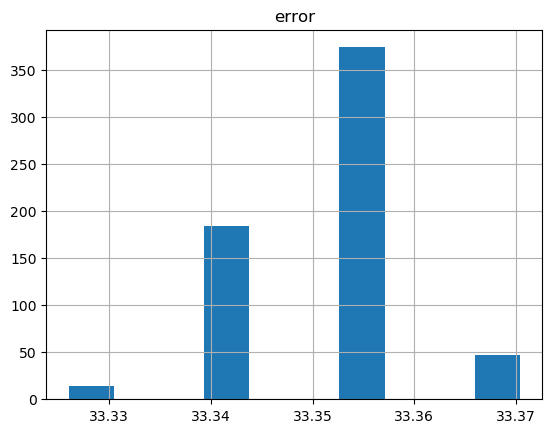

In [16]:
df_op_s.hist(column='error')

Observing the histogram we can see that the error in terms of distance from known position is in range between (31,32) which is pretty small. And we can also see that majority of the error is approximately the mean error. This may indicate that the location where the data was taken and the reference vlaues may not be the same. And the outliers may be causes due to the precision error.
***

In [17]:
mean_error = df_op_s['error'].mean()
mean_error

33.35163533414928

In [18]:
medain = df_op_s['error'].median()
medain

33.35557546934365

The error in terms of position may occur due to the following two reasons:

1. Because of HDOP value
2. The reference laitude and longitude that is derived from google maps may not exactly be where the GPS data was recorded. 
***

In [19]:
# Scatter plot of altitude vs time

fig_1 = px.scatter(df_op_s, x="UTC", y="Altitude",labels={"Altitude": "Altitude (M)", "UTC": "Time in Seconds"}, title="Open Space")
fig_1.show()

## Analysis of stationary data from occuled field
Location - 3411 Washington Street, Jamaica Plains

From google maps -> lat - 42.30835809421112, lon - -71.1060346304591
***

In [20]:
known_lat, known_lon = 42.30835809421112, -71.1060346304591


utm_converted = utm.from_latlon(known_lat,known_lon)

known_easting,known_northing,known_zone,known_letter = utm_converted[0],utm_converted[1],utm_converted[2],utm_converted[3]

In [21]:
# Scaling data
df_oc_s['modified_northing'] = df_oc_s['UTM_northing'] - df_oc_s.UTM_northing[0]
df_oc_s['modified_easting'] = df_oc_s['UTM_easting'] - df_oc_s.UTM_easting[0]

In [22]:
fig = px.scatter(df_oc_s, x="modified_northing", y="modified_easting", color="HDOP",labels={"modified_northing": "Northing (M)", "modified_easting": "Easting (M)"}, title="Occluded Space")
fig.show()

# Range of position

northing - (-2.5,0)
eastng - (0,4.5)

Immediately we can see that the range of GPS data is larger than that one collected in an open field. This shows that in occuled space, the data may be more imprecise. This may be due to the multi-path effect caused by buildings reflecting GPS signals.
***

In [23]:
# Comparision between gps and google map position
x = known_northing - df_oc_s.UTM_northing[0]
y = known_easting - df_oc_s.UTM_easting[0]
fig.add_scatter(x=[x],y=[y],name='Actual position')
fig.show()

In [24]:
df_oc_s['error'] = ((df_oc_s['modified_northing']-x)**2 + (df_oc_s['modified_easting']-y)**2)**(1/2)
df_oc_s

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,Altitude,HDOP,Fix_quality,UTM_easting,UTM_northing,UTC,Zone,Letter,modified_northing,modified_easting,error
0,1.677020e+09,19,230101,0,GPS1_Frame,42.308193,-71.105942,18.700001,0.88,5,326431.03125,4686143.0,230101.0,19,T,0.0,0.00000,19.870267
1,1.677020e+09,20,230102,0,GPS1_Frame,42.308193,-71.105942,18.900000,0.88,5,326431.28125,4686143.0,230102.0,19,T,0.0,0.25000,19.959070
2,1.677020e+09,21,230103,0,GPS1_Frame,42.308189,-71.105942,19.100000,0.88,5,326431.46875,4686143.0,230103.0,19,T,0.0,0.43750,20.027462
3,1.677020e+09,22,230104,0,GPS1_Frame,42.308189,-71.105934,19.400000,0.88,5,326431.68750,4686142.5,230104.0,19,T,-0.5,0.65625,20.572901
4,1.677020e+09,23,230105,0,GPS1_Frame,42.308189,-71.105934,19.600000,0.88,5,326431.90625,4686142.5,230105.0,19,T,-0.5,0.87500,20.654766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,1.677021e+09,556,230958,0,GPS1_Frame,42.308186,-71.105911,21.500000,0.75,5,326434.03125,4686142.0,230958.0,19,T,-1.0,3.00000,21.994368
538,1.677021e+09,557,230959,0,GPS1_Frame,42.308186,-71.105911,21.500000,0.75,5,326434.06250,4686142.0,230959.0,19,T,-1.0,3.03125,22.008521
539,1.677021e+09,558,231000,0,GPS1_Frame,42.308186,-71.105911,21.600000,0.75,5,326434.06250,4686142.0,231000.0,19,T,-1.0,3.03125,22.008521
540,1.677021e+09,559,231001,0,GPS1_Frame,42.308186,-71.105911,21.600000,0.75,5,326434.06250,4686142.0,231001.0,19,T,-1.0,3.03125,22.008521


In [25]:
df_oc_s["HDOP"].unique()

array([0.88      , 0.94999999, 0.88999999, 0.86000001, 0.85000002,
       0.83999997, 0.89999998, 0.82999998, 0.87      , 0.94      ,
       0.80000001, 0.79000002, 0.91000003, 0.75999999, 0.81999999,
       0.76999998, 0.69      , 0.70999998, 0.81      , 0.74000001,
       0.75      , 0.67000002, 0.66000003, 0.68000001, 0.72000003,
       0.73000002, 0.69999999])

In [26]:
df_oc_s["Fix_quality"].unique()

array([5])

We can aslo see that in occulded space the data contains different HDOP values despite being taken in a stationary spot. This also affects the accuracy and precision of data.
***

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1890118d00>]],
      dtype=object)

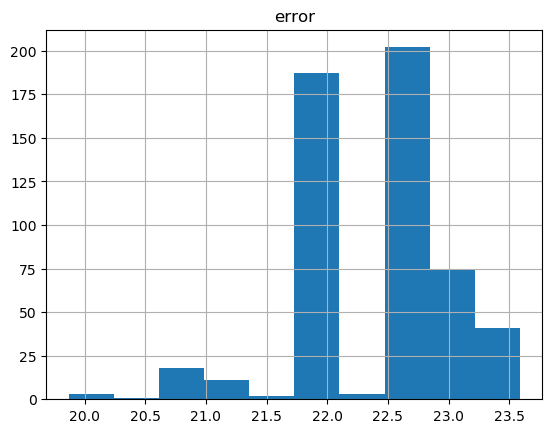

In [27]:
df_oc_s.hist(column='error')

We can see that the error histograms range is larger (19,23). But we can observe that most errors are in between the vlaue (22,23) which is less that that of one in the open field. This may be because the data values when HDOP was 1.1 was higher in number resulting in more precision than that one in open field where the HDOP was 1.2. Hence we can assume that the data received from GPS was more closer to the reference location. Still difference in actual positon where the data was recorded contributes to the error. And the large range of errors may be due to the difference in HDOP values.
***

In [28]:
mean_error = df_oc_s['error'].mean()
mean_error

22.423836328488758

In [29]:
medain = df_oc_s['error'].median()
medain

22.653137718024272

In [30]:
# Scatter plot of altitude vs time

fig_1 = px.scatter(df_oc_s, x="UTC", y="Altitude",labels={"Altitude": "Altitude (M)", "UTC": "Time in Seconds"}, title="Occluded Space")
fig_1.show()

## Analysis of walking data from open field
Location - Scagnoli-Nihill Athletic Complex in Jamaica Plains

From google maps -> lat = 42.30775, lon = -71.10752
***

In [31]:

known_lat, known_lon = 42.30775, -71.10752

utm_converted = utm.from_latlon(42.30775,-71.10752)

known_easting,known_northing,known_zone,known_letter = utm_converted[0],utm_converted[1],utm_converted[2],utm_converted[3]

df_op_w.head()

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,Altitude,HDOP,Fix_quality,UTM_easting,UTM_northing,UTC,Zone,Letter
0,1.677019e+09,735,224025,0,GPS1_Frame,42.307976,-71.107376,28.0,0.74,5,326312.18750,4686122.0,224025.0,19,T
1,1.677019e+09,736,224026,0,GPS1_Frame,42.307972,-71.107368,28.0,0.74,5,326312.90625,4686121.5,224026.0,19,T
2,1.677019e+09,737,224027,0,GPS1_Frame,42.307968,-71.107368,28.0,0.74,5,326313.37500,4686121.0,224027.0,19,T
3,1.677019e+09,738,224028,0,GPS1_Frame,42.307964,-71.107361,28.1,0.74,5,326313.93750,4686120.5,224028.0,19,T
4,1.677019e+09,739,224029,0,GPS1_Frame,42.307961,-71.107353,28.5,0.70,5,326314.59375,4686120.5,224029.0,19,T


In [32]:
# Scaling data
df_op_w['modified_northing'] = df_op_w['UTM_northing'] - df_op_w.UTM_northing[0]
df_op_w['modified_easting'] = df_op_w['UTM_easting'] - df_op_w.UTM_easting[0]

In [33]:
fig = px.scatter(df_op_w, x="modified_northing", y="modified_easting", labels={"modified_northing":"Northing (M)","modified_easting": "Easting (M)"}, title="Moving in Open Space")
fig.show()

In [34]:
# Scatter plot of altitude vs time

fig_1 = px.scatter(df_op_w, x="UTC", y="Altitude",labels={"Altitude": "Altitude (M)", "UTC": "Time in Seconds"}, title="Walking")
fig_1.show()

## Analysis of walking data in occluded space

Location - 3411 Washington Street, Jamaica Plains

From google maps -> lat - 42.30835809421112, lon - -71.1060346304591
***

In [35]:
known_lat, known_lon = 42.3083, -71.1060

utm_converted = utm.from_latlon(known_lat, known_lon)

known_easting,known_northing,known_zone,known_letter = utm_converted[0],utm_converted[1],utm_converted[2],utm_converted[3]

df_oc_w.head()

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,Altitude,HDOP,Fix_quality,UTM_easting,UTM_northing,UTC,Zone,Letter
0,1.677021e+09,21,231444,0,GPS1_Frame,42.308220,-71.106026,18.100000,1.76,5,326424.34375,4686146.0,231444.0,19,T
1,1.677021e+09,22,231504,0,GPS1_Frame,42.308239,-71.106071,20.200001,1.28,5,326420.46875,4686148.5,231504.0,19,T
2,1.677021e+09,23,231506,0,GPS1_Frame,42.308231,-71.106079,20.299999,1.21,5,326419.96875,4686147.5,231506.0,19,T
3,1.677021e+09,24,231507,0,GPS1_Frame,42.308228,-71.106087,20.500000,1.02,5,326419.68750,4686147.5,231507.0,19,T
4,1.677021e+09,25,231508,0,GPS1_Frame,42.308228,-71.106087,20.500000,0.96,5,326419.21875,4686147.0,231508.0,19,T


In [36]:
# Scaling data
df_oc_w['modified_northing'] = df_oc_w['UTM_northing'] - df_oc_w.UTM_northing[0]
df_oc_w['modified_easting'] = df_oc_w['UTM_easting'] - df_oc_w.UTM_easting[0]

In [37]:
fig = px.scatter(df_oc_w, x="modified_northing", y="modified_easting", labels={"modified_northing":"Northing (M)","modified_easting": "Easting (M)"}, title="Moving in Open Space")
fig.show()

In [38]:

fig_1 = px.scatter(df_oc_w, x="UTC", y="Altitude",labels={"Altitude": "Altitude (M)", "UTC": "Time in Seconds"}, title="Walking")
fig_1.show()